In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:

data = pd.read_csv("https://raw.githubusercontent.com/GirlScript-Manipal/ML-Winter-Bootcamp/main/Week%202%263%20Datasets/LinearReg_Insurance.csv")
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
category = data.dtypes[data.dtypes == 'object'].index
print(category)

Index(['sex', 'smoker', 'region'], dtype='object')


In [34]:
data[category].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [35]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [36]:
print(data.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


In [37]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [38]:
print(data.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [39]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [40]:
print(data.region.value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [41]:
data.shape

(1338, 7)

In [42]:
data=data.drop_duplicates()

In [43]:
dummies1=pd.get_dummies(data.sex)
print(dummies1.head())
dummies2=pd.get_dummies(data.smoker)
print(dummies2.head())
dummies3=pd.get_dummies(data.region)
print(dummies3.head())


   female  male
0       1     0
1       0     1
2       0     1
3       0     1
4       0     1
   no  yes
0   0    1
1   1    0
2   1    0
3   1    0
4   1    0
   northeast  northwest  southeast  southwest
0          0          0          0          1
1          0          0          1          0
2          0          0          1          0
3          0          1          0          0
4          0          1          0          0


In [44]:
merge=pd.concat([data,dummies1],axis=1)
merge.head()


,age,sex,bmi,children,smoker,region,charges,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [45]:

merge=merge.drop(['sex','female'], axis=1)
merge.head()


,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [46]:
merge=pd.concat([merge,dummies2],axis=1)
merge.head()


,age,bmi,children,smoker,region,charges,male,no,yes
0,19,27.900,0,yes,southwest,16884.92400,0,0,1
1,18,33.770,1,no,southeast,1725.55230,1,1,0
2,28,33.000,3,no,southeast,4449.46200,1,1,0
3,33,22.705,0,no,northwest,21984.47061,1,1,0
4,32,28.880,0,no,northwest,3866.85520,1,1,0


In [47]:
merge=merge.drop(['smoker','yes'], axis=1)
merge.head()

,age,bmi,children,region,charges,male,no
0,19,27.900,0,southwest,16884.92400,0,0
1,18,33.770,1,southeast,1725.55230,1,1
2,28,33.000,3,southeast,4449.46200,1,1
3,33,22.705,0,northwest,21984.47061,1,1
4,32,28.880,0,northwest,3866.85520,1,1


In [48]:
merge=pd.concat([merge,dummies3],axis=1)
merge.head()

,age,bmi,children,region,charges,male,no,northeast,northwest,southeast,southwest
0,19,27.900,0,southwest,16884.92400,0,0,0,0,0,1
1,18,33.770,1,southeast,1725.55230,1,1,0,0,1,0
2,28,33.000,3,southeast,4449.46200,1,1,0,0,1,0
3,33,22.705,0,northwest,21984.47061,1,1,0,1,0,0
4,32,28.880,0,northwest,3866.85520,1,1,0,1,0,0


In [49]:
merge=merge.drop(['region','northeast'], axis=1)
merge.head()

,age,bmi,children,charges,male,no,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,0,0,0,1
1,18,33.770,1,1725.55230,1,1,0,1,0
2,28,33.000,3,4449.46200,1,1,0,1,0
3,33,22.705,0,21984.47061,1,1,1,0,0
4,32,28.880,0,3866.85520,1,1,1,0,0


In [50]:
df=merge
df.head()

,age,bmi,children,charges,male,no,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,0,0,0,1
1,18,33.770,1,1725.55230,1,1,0,1,0
2,28,33.000,3,4449.46200,1,1,0,1,0
3,33,22.705,0,21984.47061,1,1,1,0,0
4,32,28.880,0,3866.85520,1,1,1,0,0


In [51]:
shuffle=df.sample(frac=1)
train_size=int(0.6*len(df))
train=shuffle[:train_size]
test=shuffle[train_size:]
train.head()

,age,bmi,children,charges,male,no,northwest,southeast,southwest
876,49,27.100,1,26140.36030,0,1,0,0,1
1000,30,22.990,2,17361.76610,1,0,1,0,0
301,53,22.610,3,24873.38490,0,0,0,0,0
106,19,28.400,1,2331.51900,0,1,0,0,1
948,42,31.255,0,6358.77645,1,1,1,0,0


In [52]:
test.head()

,age,bmi,children,charges,male,no,northwest,southeast,southwest
1201,46,40.375,2,8733.22925,1,1,1,0,0
1222,50,25.300,0,8442.66700,1,1,0,1,0
265,46,42.350,3,46151.12450,1,0,0,1,0
918,61,28.200,0,13041.92100,0,1,0,0,1
494,21,25.700,4,17942.10600,1,0,0,0,1


In [53]:
train_data = train.values
Y = train_data[:, -1].reshape(train_data.shape[0], 1)
X = train_data[:, :-1]
test_data = test.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)
X_test = test_data[:, :-1]

In [59]:
print("Shape of X_train :", X.shape)
print("Shape of Y_train :", Y.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (802, 9)
Shape of Y_train : (802, 1)
Shape of X_test : (535, 9)
Shape of Y_test : (535, 1)


In [55]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [62]:
def model(X, Y, learning_rate, iteration):
   m = Y.size
   theta = np.zeros((X.shape[1], 1))
   cost_list = []
   for i in range(iteration):
     y_pred = np.dot(X, theta)
     cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
     d_theta = (1/m)*np.dot(X.T, y_pred - Y)
     theta = theta - learning_rate*d_theta
     cost_list.append(cost)
     if (i%10000==0):
       print("Cost is :", cost)
   return theta, cost_list

In [74]:
iteration = 10000
learning_rate = 0.0000000001
theta, cost_list = model(X, Y, learning_rate = learning_rate, iteration =iteration)

Cost is : 0.12406483790523691


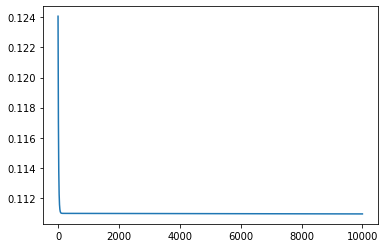

In [75]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()

In [76]:
y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : 29.99821395841174 %
Test Accuracy is : 70.00178604158826 %
